In [492]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
                                
import seaborn as sns
import matplotlib.pyplot as plt
import holoviews as hv
from holoviews import opts, dim



## Import data

In [716]:
# synthetic data for demo purposes
# as per convention, data show how [row] impact [col] 
# need to clarify convention, for now assume that [row] is needed in orderto proceed with [col]

M = np.array([[0, 1, 1, 0],
              [0, 0, 3, 0],
              [0, 0, 0, 2],
              [0, 0, 0, 0]])

projects = ['A','B','C','D']

df = pd.DataFrame(data = M, index = projects, columns = projects)
df = pd.read_csv('Book1.csv', index_col=0)
df.head()

,WS1,WS2,WS3,WS4,WS5,WS6,WS7,WS8,WS9,WS10,...,WS21,WS22,WS23,WS24,WS25,WS26,WS27,WS28,WS29,WS30
WS1,0,1,3,2,1,3,1,0,2,0,...,1,2,0,3,1,2,0,3,3,0
WS2,2,0,3,2,2,1,2,2,3,3,...,2,3,0,1,2,2,0,2,1,1
WS3,2,2,0,3,0,0,0,2,2,2,...,3,1,2,3,3,2,0,1,3,1
WS4,3,2,3,0,0,2,0,2,1,3,...,0,1,3,0,2,1,2,3,2,3
WS5,2,0,1,0,0,2,3,1,1,2,...,1,0,1,2,2,0,2,2,0,0


## Visualize raw data 

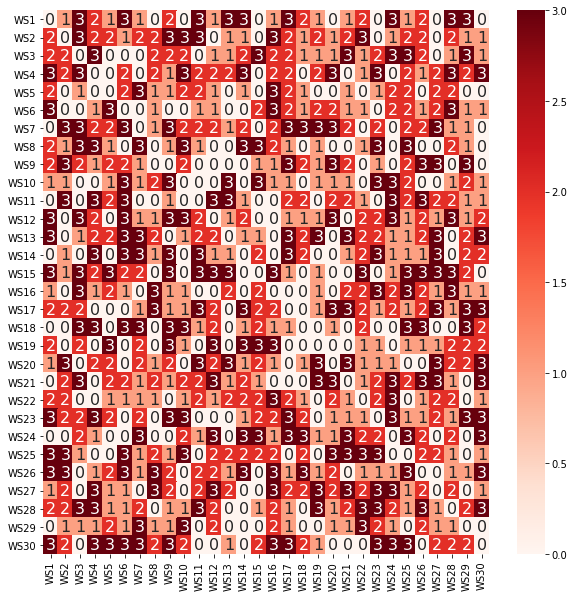

In [720]:
# heatmap could be a good option
plt.figure(figsize = (10,10))
sns.heatmap(df, annot=True, annot_kws={"size": 16}, cmap = 'Reds')
#sns.plt.show()


## Evaluate projects priorities

In [721]:
def pagerank(M, eps=1.0e-8, d=0.85):
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    last_v = np.ones((N, 1), dtype=np.float32) * 100
    
    while np.linalg.norm(v - last_v, 2) > eps:
        last_v = v
        v = d * np.matmul(M, v) + (1 - d) / N
    
    return v

In [771]:
a = normalize(df, axis = 0, norm = 'l1')


pr = pagerank(a, eps=1.0e-8, d=.85)
print(pr)
print(pr.shape[0])




[[0.03404546]
 [0.0351807 ]
 [0.03489788]
 [0.03788335]
 [0.02506837]
 [0.02810769]
 [0.03915829]
 [0.02920116]
 [0.03060041]
 [0.02785531]
 [0.03318792]
 [0.03486569]
 [0.03737154]
 [0.03250829]
 [0.03717667]
 [0.02975106]
 [0.03722885]
 [0.02978156]
 [0.02745197]
 [0.03568696]
 [0.03652263]
 [0.03052123]
 [0.03487293]
 [0.03475315]
 [0.03626328]
 [0.03516437]
 [0.03730534]
 [0.03626619]
 [0.02441155]
 [0.0369102 ]]
30


## Visualize

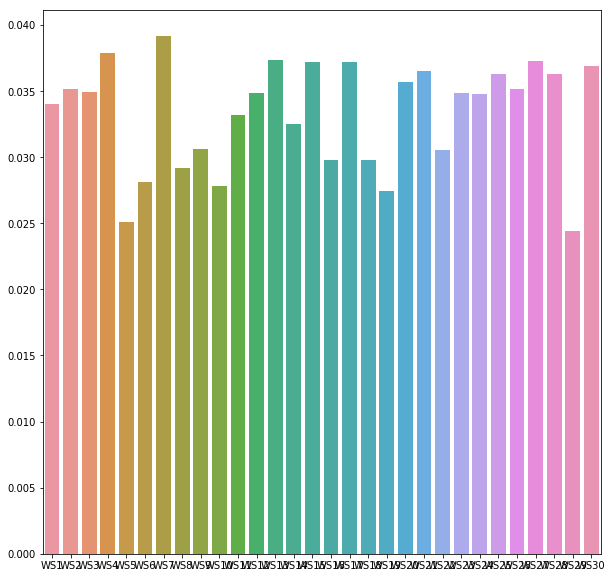

In [773]:
# first of all, let's see the computed priorities in a bar plot

plt.figure(figsize = (10,10))
sns.barplot(x = df.index, 
            y = [pr[i][0] for i in range(pr.shape[0])]) # there must be a better way... )


In [724]:
a = np.array([])
a = np.append(a, 3)
print(a)

[3.]


c:\users\aless\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in multiply


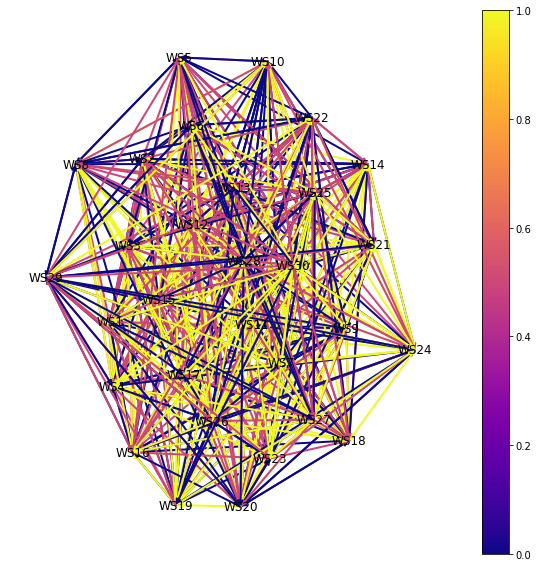

In [731]:
# visualize in network graph

k = 10000    # scaling factor for node size

np.random.seed(42) # otherwise the graph structure changes every time [look for smarter node placement]
G_plot = nx.from_pandas_adjacency(df, create_using=nx.DiGraph())

# assigns positions and strength-proportional colors
edge_importance = np.array([])
#node_sizes = np.array([])

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.iloc[i][j] != 0:
            edge_importance = np.append(edge_importance, df.iloc[i][j])
            #node_sizes = node_sizes.append(pr) 

edge_importance = normalize(edge_importance.reshape(-1, 1), norm='l2', axis = 0)
node_sizes = normalize(node_sizes, norm='l2', axis = 0)

fig, ax = plt.subplots(figsize = (10,10))
ax = nx.draw(G_plot, with_labels=True, node_color='skyblue', 
             node_size = pr * k, 
             width = 2,
             edge_cmap = plt.cm.plasma,
             edge_color = edge_importance.reshape(1, -1)[0])

# add color bar [figure out how to add label]
sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma)
sm._A = []
plt.colorbar(sm)

plt.show()


In [727]:
'''from bokeh.sampledata.les_mis import data 
    
hv.extension('bokeh')
hv.output(size=200)

print(data.keys())

links = pd.DataFrame(data['links'])
print(links.head(3))

nodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')
print(nodes.data.head())


chord = hv.Chord((links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

'''

"from bokeh.sampledata.les_mis import data \n    \nhv.extension('bokeh')\nhv.output(size=200)\n\nprint(data.keys())\n\nlinks = pd.DataFrame(data['links'])\nprint(links.head(3))\n\nnodes = hv.Dataset(pd.DataFrame(data['nodes']), 'index')\nprint(nodes.data.head())\n\n\nchord = hv.Chord((links, nodes)).select(value=(5, None))\nchord.opts(\n    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), \n               labels='name', node_color=dim('index').str()))\n\n"

In [728]:
col = ['Source_Proj', 'Destination_Proj', 'Strenght']
df_links = pd.DataFrame([], columns = col)

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        if df.iloc[i][j] != 0:
            df2 = pd.DataFrame(data = [(df.index[i], df.columns[j], df.iloc[i][j])], columns = col)
            df_links = df_links.append(df2, ignore_index=True)


df_links['Strenght'] = df_links['Strenght'].astype('float')
df_links['Strenght'] = normalize(np.array(df_links['Strenght']).reshape(-1, 1), norm='l2', axis = 0)


print(df_links)
#hv.Chord(df_links)

    Source_Proj Destination_Proj  Strenght
0           WS1              WS2  0.018051
1           WS1              WS3  0.054153
2           WS1              WS4  0.036102
3           WS1              WS5  0.018051
4           WS1              WS6  0.054153
5           WS1              WS7  0.018051
6           WS1              WS9  0.036102
7           WS1             WS11  0.054153
8           WS1             WS12  0.018051
9           WS1             WS13  0.054153
10          WS1             WS14  0.054153
11          WS1             WS16  0.018051
12          WS1             WS17  0.054153
13          WS1             WS18  0.036102
14          WS1             WS19  0.018051
15          WS1             WS21  0.018051
16          WS1             WS22  0.036102
17          WS1             WS24  0.054153
18          WS1             WS25  0.018051
19          WS1             WS26  0.036102
20          WS1             WS28  0.054153
21          WS1             WS29  0.054153
22         

In [730]:
hv.output(size=200)

projects = df.columns
print(projects)
nodes = pd.DataFrame(projects, columns = ['Projects'])
nodes = hv.Dataset(nodes, 'Projects')
nodes.data.head()

chord = hv.Chord((df_links, nodes)).select(value=(5, None))
chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('Source_Proj').str(), 
               labels='Projects', node_color=dim('Projects').str()))

Index(['WS1', 'WS2', 'WS3', 'WS4', 'WS5', 'WS6', 'WS7', 'WS8', 'WS9', 'WS10',
       'WS11', 'WS12', 'WS13', 'WS14', 'WS15', 'WS16', 'WS17', 'WS18', 'WS19',
       'WS20', 'WS21', 'WS22', 'WS23', 'WS24', 'WS25', 'WS26', 'WS27', 'WS28',
       'WS29', 'WS30'],
      dtype='object')


:Chord   [Source_Proj,Destination_Proj]   (Strenght)